# Setup

Since [Pandas](https://pandas.pydata.org/) is almost a one stop shop for everything data analysis in python anyway, most plotting is done using `df.plot()` syntax, however, you must import [Matplotlib](https://matplotlib.org/index.html) since this is a dependency. I would also recommend installing [Seaborn](https://seaborn.pydata.org/) for more interesting plot types and statistical features. Plus it has a nice native style.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## Display

Couple options for visualizing in a Jupyter Notebook. Either present static charts `inline`, embed them as interactive elements using `notebook` setting, or open the chart in a new windows from backend usiing `gtk`.  [source](http://ipython.readthedocs.io/en/stable/interactive/plotting.html)

In [4]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib gtk

## Style

Call `plt.style.available` to show options, then set the style of choice.

And customize the style sheet manually using `rcParams`

See more on styling here: https://matplotlib.org/users/customizing.html

In [2]:
plt.style.use('seaborn-white')

In [3]:
mpl.rc('figure')
mpl.rc('savefig', transparent=True, dpi=700, bbox='tight', pad_inches=.05, format='svg')

# Data

In [5]:
df = pd.DataFrame(data=np.random.rand(36,4),
                  index=pd.date_range(end=pd.datetime.now(), periods=36, freq='MS'),
                  columns=['A', 'B', 'C', 'D'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2014-10-01 14:41:00.610180 to 2017-09-01 14:41:00.610180
Freq: MS
Data columns (total 4 columns):
A    36 non-null float64
B    36 non-null float64
C    36 non-null float64
D    36 non-null float64
dtypes: float64(4)
memory usage: 1.4 KB


In [7]:
df.describe()

,A,B,C,D
count,36.000000,36.000000,36.000000,36.000000
mean,0.462236,0.471408,0.503072,0.396826
std,0.325355,0.331237,0.312643,0.306851
min,0.004162,0.033121,0.019178,0.001582
25%,0.166465,0.119405,0.241139,0.129689
50%,0.382556,0.488052,0.524670,0.284263
75%,0.740098,0.780000,0.803169,0.669344
max,0.975039,0.990097,0.981579,0.935652


In [8]:
df.head()

,A,B,C,D
2014-10-01 14:41:00.610180,0.239137,0.101376,0.913943,0.044647
2014-11-01 14:41:00.610180,0.717681,0.844062,0.436501,0.001582
2014-12-01 14:41:00.610180,0.076067,0.614361,0.809722,0.230501
2015-01-01 14:41:00.610180,0.807348,0.141087,0.343055,0.852479
2015-02-01 14:41:00.610180,0.120718,0.460933,0.887574,0.367111


## Transform

Group data over time periods. Refer to [Pandas Offset Aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

In [9]:
dfA = df.groupby(pd.TimeGrouper('1A')).sum()

In [10]:
dfA.shape

(4, 4)

In [11]:
dfM = df.groupby(pd.TimeGrouper('6M')).sum()

In [12]:
dfM.shape

(7, 4)

# Visualizations

## Plot Categorical Data Over Time

C:\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


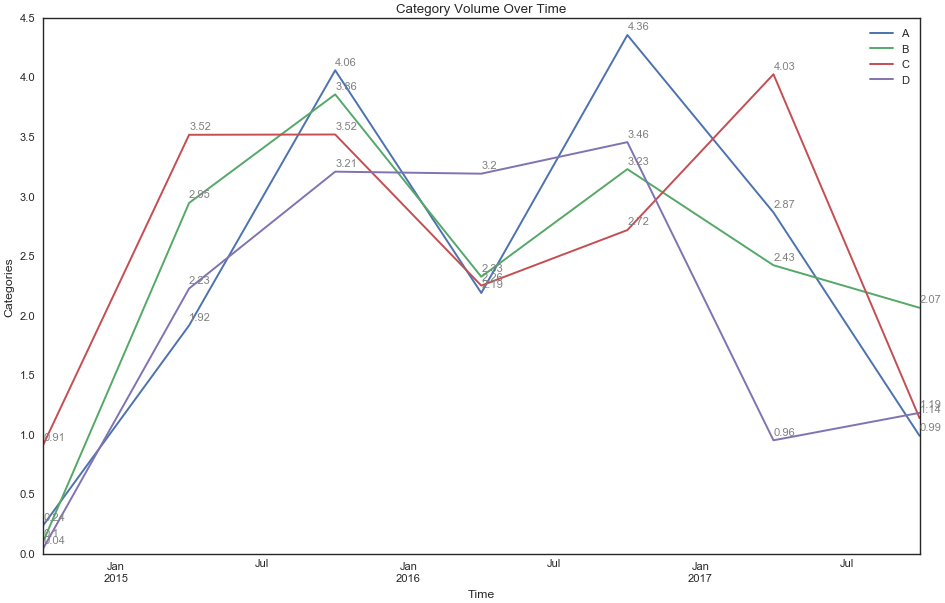

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

dfM.plot(ax=ax)

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume Over Time')

for series in dfM.columns:
    for x,y in zip(dfM.index, dfM[series]):
        ax.annotate(str(round(y,2)),
                    xy=(x,y+(.01*dfM.values.max())),
                    fontsize=10, color='grey')

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_over_time')

## Plot Categorical Data Over Time Groups

C:\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


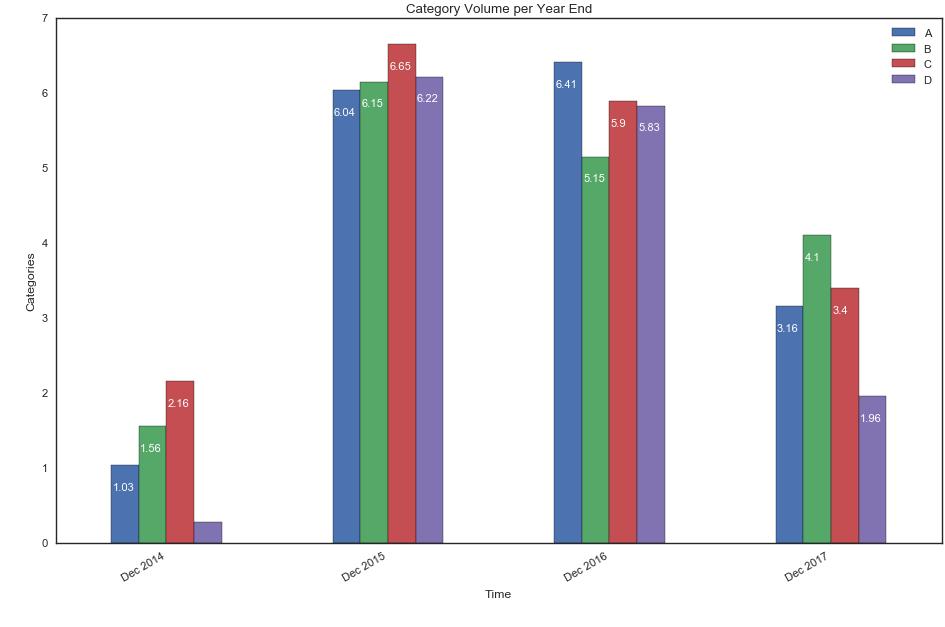

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

dfA.plot(kind='bar', ax=ax)

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume per Year End')

# auto format xaxis labels as date
fig.autofmt_xdate()

# custom format xaxis date labels
# current bug in pandas doesn't allow the following (https://github.com/pandas-dev/pandas/issues/1918)
#ax.xaxis_date()
#ax.xaxis.set_major_locator(mpl.dates.YearLocator())
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %Y'))
# so instead we manually set xaxis labels to our custom formatted df index as series of strings
ax.xaxis.set_major_formatter(plt.FixedFormatter(dfA.index.to_series().dt.strftime('%b %Y')))

# annotate data labels onto vertical bars
# see https://matplotlib.org/users/annotations_guide.html
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([dfA.columns,dfA.index])):
    ax.annotate(str(round(dfA.loc[ix,col],2)), 
                xy=(bar.get_x()+(bar.get_width()*.05), bar.get_height()-(dfA.values.max()*.05)),
                fontsize=10, color='white')

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_per_year_end')

## Scatterplot Matrix

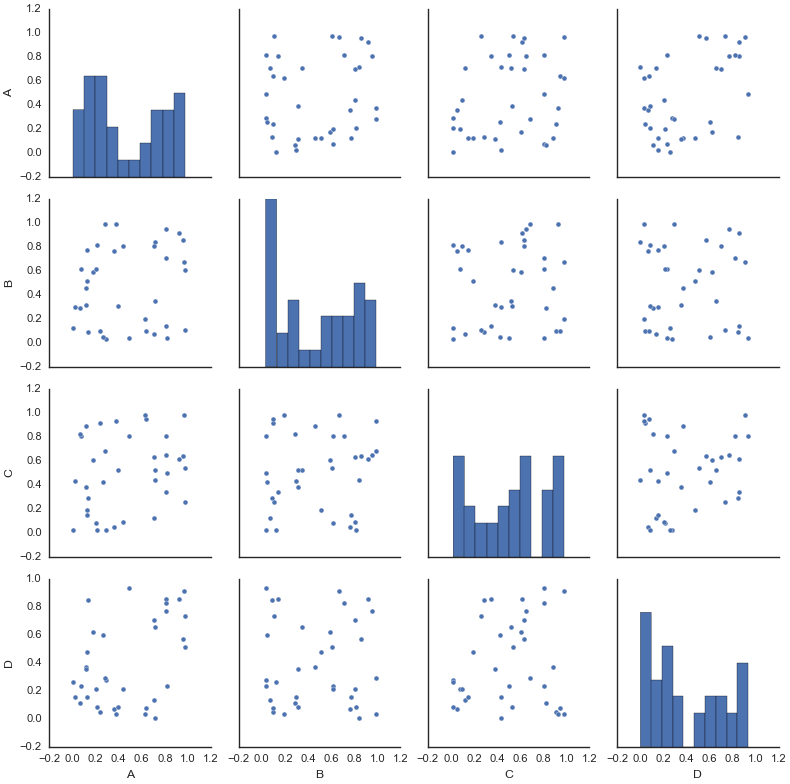

In [15]:
plot = sns.pairplot(df)
plot.savefig('scatterplot_matrix')

## KDE Plot

C:\Miniconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


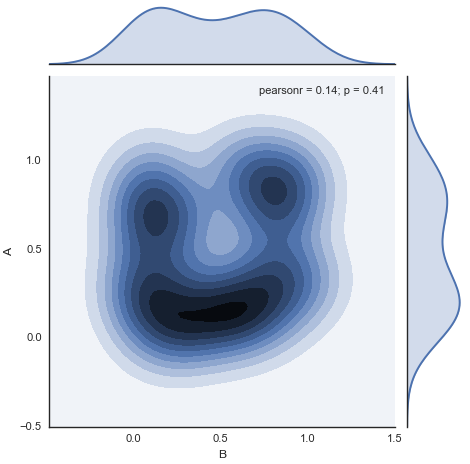

In [16]:
plot = sns.jointplot(x="B", y="A", data=df, kind='kde')
plot.savefig('kde_plot')

# Resources

- [Matplotlib docs](https://matplotlib.org/contents.html)  
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)  
- [Seaborn docs](https://seaborn.pydata.org/api.html) and [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html#tutorial)  

Chris Moffitt at Practical Business Python has a [great tutorial and helpful infographic](http://pbpython.com/effective-matplotlib.html) on matplotlib  
